In [6]:
!pip install pandas numpy matplotlib seaborn lxml








1. Перші 5 рядків:
  Country/Territory IMF[1][12]            World Bank[13]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  115494312       2025      105435540       2023   
1     United States   30338000       2025       27360935       2023   
2             China   19535000  [n 1]2025       17794782  [n 3]2023   
3           Germany    4922000       2025        4456081       2023   
4             Japan    4390000       2025        4212945       2023   

  United Nations[14]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  

2. Розмір датасету: (210, 7)

3. Нові назви стовпців: ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']

4. Типи даних до обробки:
Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: ob

<ipython-input-7-74698152bfad>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(clean_numeric)
<ipython-input-7-74698152bfad>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(numeric_only=True), inplace=True)
<ipython-input-7-74698152bfad>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)
<ipython-input-

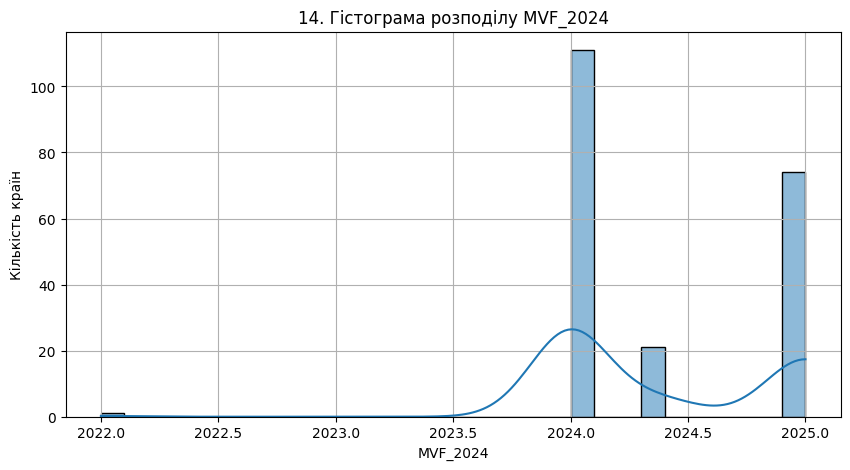


15. Частка США у загальному ВВП по роках:
Empty DataFrame
Columns: [Country, share_MVF_2024, share_WorldBank_2023, share_OON_2022]
Index: []


<ipython-input-7-74698152bfad>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'share_{col}'] = df[col] / df[col].sum()
<ipython-input-7-74698152bfad>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'share_{col}'] = df[col] / df[col].sum()
<ipython-input-7-74698152bfad>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

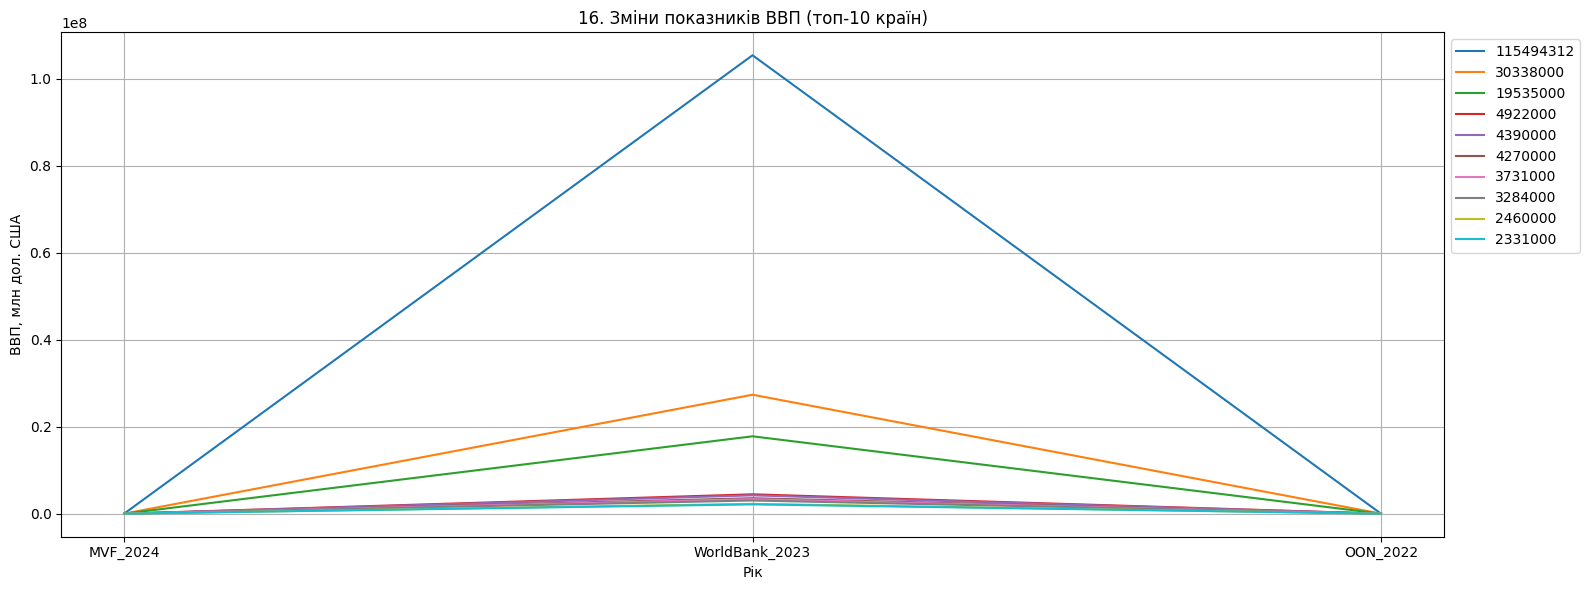

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Зчитування таблиці з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]  # у Вікіпедії таблиця з ВВП — третя за рахунком

# 2. Вивести перші 5 рядків
print("1. Перші 5 рядків:")
print(df.head())

# 3. Розмір датасету
print("\n2. Розмір датасету:", df.shape)

# 4. Оптимізація кількості стовпців (беремо тільки потрібні)
df = df.iloc[:, [1, 2, 3, 4]]
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']
print("\n3. Нові назви стовпців:", df.columns.tolist())

# 5. Типи даних до обробки
print("\n4. Типи даних до обробки:")
print(df.dtypes)

# 6. Очищення даних
def clean_numeric(value):
    if pd.isna(value):
        return np.nan
    value = str(value).split('[')[0].replace(',', '').replace('—', '').strip()
    try:
        return float(value)
    except:
        return np.nan

for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    df[col] = df[col].apply(clean_numeric)

# 7. Перевірка пропущених значень
print("\n5. Пропущені значення перед заміною:")
print(df.isna().sum())

# Заповнення пропущених значень середніми
df.fillna(df.mean(numeric_only=True), inplace=True)

# 8. Повторна перевірка
print("\n6. Пропущені значення після заповнення:")
print(df.isna().sum())

# 9. Перевірка дублікатів
duplicates = df.duplicated().sum()
print("\n7. Кількість дублікатів:", duplicates)
df.drop_duplicates(inplace=True)

# 10. Описова статистика
print("\n8. Описова статистика:")
print(df.describe())

# 11. Різниця між MVF_2024 та WorldBank_2023
df['Diff_MVF_WB'] = df['MVF_2024'] - df['WorldBank_2023']
top_diff = df[['Country', 'Diff_MVF_WB']].sort_values(by='Diff_MVF_WB', ascending=False).head()
print("\n9. Країни з найбільшими відхиленнями між MVF_2024 та WorldBank_2023:")
print(top_diff)

# 12. Кореляція
print("\n10. Кореляція:")
print(df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr())

# 13. Середнє по роках
print("\n11. Середнє значення по роках:")
print(df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean())

# 14. Стандартне відхилення по країнах
df['std_dev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
max_std = df.loc[df['std_dev'].idxmax()]
print("\n12. Країна з найбільшою варіативністю показників:")
print(max_std[['Country', 'std_dev']])

# 15. Країни з найвищими та найнижчими значеннями
print("\n13. Найвищі та найнижчі показники:")
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    max_country = df.loc[df[col].idxmax()]
    min_country = df.loc[df[col].idxmin()]
    print(f"{col}: Макс — {max_country['Country']} ({max_country[col]}), Мін — {min_country['Country']} ({min_country[col]})")

# 16. Гістограма MVF_2024
plt.figure(figsize=(10, 5))
sns.histplot(df['MVF_2024'], bins=30, kde=True)
plt.title('14. Гістограма розподілу MVF_2024')
plt.xlabel('MVF_2024')
plt.ylabel('Кількість країн')
plt.grid()
plt.show()

# 17. Частка кожної країни у загальному ВВП
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    df[f'share_{col}'] = df[col] / df[col].sum()

print("\n15. Частка США у загальному ВВП по роках:")
print(df[df['Country'] == 'United States'][['Country', 'share_MVF_2024', 'share_WorldBank_2023', 'share_OON_2022']])

# 18. Лінійна діаграма змін за роками
df_plot = df[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']].set_index('Country').transpose()
plt.figure(figsize=(16, 6))
for country in df['Country'][:10]:  # Показуємо тільки топ-10 країн
    plt.plot(df_plot.index, df_plot[country], label=country)
plt.title('16. Зміни показників ВВП (топ-10 країн)')
plt.xlabel('Рік')
plt.ylabel('ВВП, млн дол. США')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid()
plt.tight_layout()
plt.show()






